End to end coding of the Kaggle Project-TOXIC Comment Classification

Project Purpose
A classification model that classifies text data into six categories:
toxic, severe toxic, obscene, identity threat, insult, hatred 


In [143]:
##importing data

import pandas as pd
import numpy as np

train=pd.read_csv('C:/data mining/Data Mining Project/train.csv/train.csv')
test=pd.read_csv('C:/data mining/Data Mining Project/test.csv/test.csv')

In [144]:
##checking the data

train.head(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [145]:
test.head(20)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


In [146]:
##checking the data for missing values


#check only for NANS
train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [147]:
##checking for duplicate records
train.loc[train.duplicated()==True]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate


In [148]:
##data has no duplicates and no missing values

In [149]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [150]:
##getting the char length of the comments
train['Char_length']=train['comment_text'].apply(lambda x: len(str(x)))

In [151]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Char_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


(array([126021.,  20285.,   6626.,   2605.,   1200.,    736.,    569.,
           490.,    397.,    642.]),
 array([   6. ,  505.4, 1004.8, 1504.2, 2003.6, 2503. , 3002.4, 3501.8,
        4001.2, 4500.6, 5000. ]),
 <a list of 10 Patch objects>)

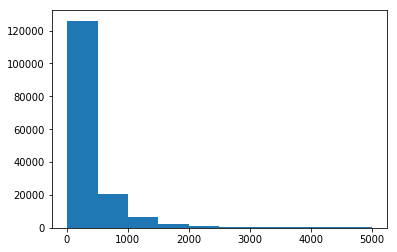

In [152]:
##plotting the bar chart

import matplotlib.pyplot as plt

plt.hist(train['Char_length'])

In [153]:
train['Char_length'].describe()

count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: Char_length, dtype: float64

In [154]:
##checking types of comments 

train.loc[train['severe_toxic']==1].head(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Char_length
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0,89
181,006e87872c8b370c,you are a stupid fuck \n\nand your mother's cu...,1,1,1,0,1,0,53
442,01208d2b76624130,Hi \n\nIm a fucking bitch.\n\n50.180.208.181,1,1,1,0,1,0,40
579,018663f910e0bfe6,What a motherfucking piece of crap those fuckh...,1,1,1,0,1,0,67
746,020316a0de9e0406,"""You know, I was thinking...\n\nNobody really ...",1,1,1,0,0,0,1610
756,0207005a6576eafc,"Here's an idea \n\nGo fuck yourself, cumshitter.",1,1,1,0,1,0,46
761,0209cdf3131130ed,""" WILL MY MOTHERFUCKING SAFETY BE GUARANTEED?...",1,1,1,0,1,0,2055
887,026bd33490542b2e,"you gay motherfucker i know where you live,i a...",1,1,1,0,1,1,137
1017,02c6e41e4b317ac3,WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...,1,1,1,1,1,1,150


In [155]:
train.loc[train['identity_hate']==1].head(20)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Char_length
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,648
105,00472b8e2d38d1ea,A pair of jew-hating weiner nazi schmucks.,1,0,1,0,1,1,42
176,006b94add72ed61c,I think that your a Fagget get a oife and burn...,1,0,1,1,1,1,128
218,008e0818dde894fb,"Kill all niggers. \n\nI have hard, that others...",1,0,1,0,1,1,120
238,0097dd5c29bf7a15,u r a tw@ fuck off u gay boy.U r smelly.Fuck u...,1,0,1,0,1,1,58
429,01166f26ee280e56,Gay \n\nThe existence of CDVF is further proof...,1,0,1,0,1,1,115
521,015d1b0bb4cc744d,Dictionaries\n\nHow dare you call my contribut...,1,0,1,0,1,1,376
887,026bd33490542b2e,"you gay motherfucker i know where you live,i a...",1,1,1,0,1,1,137
952,029dceed3519e371,you studid cock sucker u stop callin me ok its...,1,0,1,0,1,1,139
1017,02c6e41e4b317ac3,WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...,1,1,1,1,1,1,150


In [156]:
##creating word clouds
! pip install wordcloud

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [157]:
from wordcloud import WordCloud

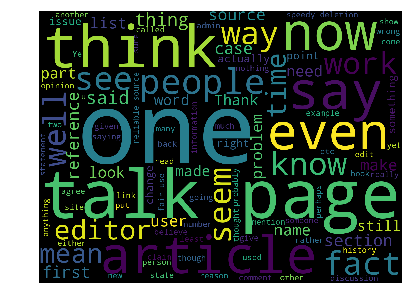

In [18]:
##creating a word cloud of all the text



cloud = WordCloud(width=1440, height= 1080,max_words= 100).generate(' '.join(train['comment_text'].astype(str)))
plt.figure(figsize=(10,5))
plt.imshow(cloud)
plt.axis('off')
plt.show()

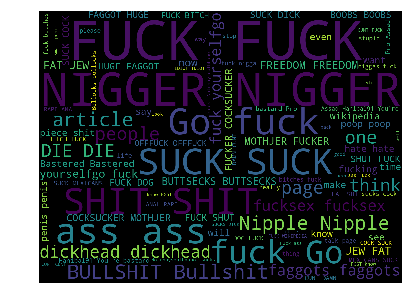

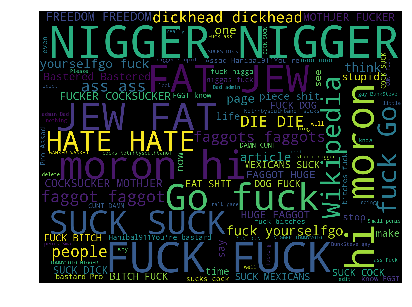

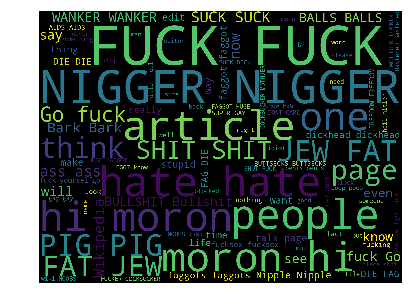

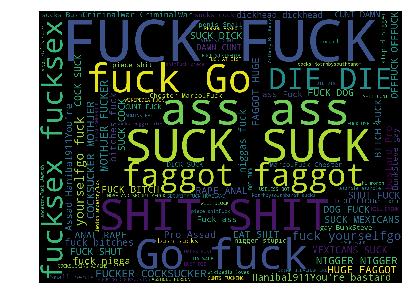

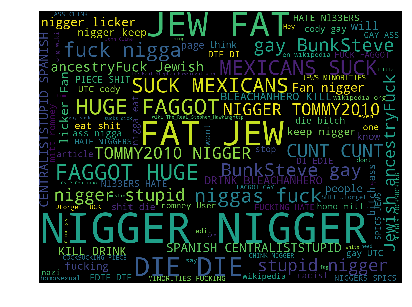

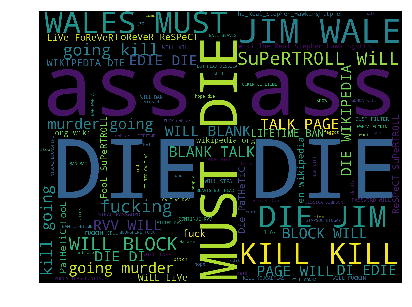

In [95]:
###checking word clouds for all the categories

target_col=['obscene','insult','toxic','severe_toxic','identity_hate','threat']

for col in target_col:
    cloud = WordCloud(width=1440, height= 1080,max_words= 100).generate(' '.join(train['comment_text'].loc[train[col]==1].astype(str)))
    plt.figure(figsize=(10,5))
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()
    

In [158]:
###data cleaning and treatment for this text is required

##importing the necessary modules



#NLTK is a leading platform for building Python programs to work with human language data. 
#It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, 
#along with a suite of text processing libraries for classification, tokenization, stemming, 
#tagging, parsing, and semantic reasoning.


import nltk as nl
import re
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

##Important Steps Involved

-cleaning the string ;Normalization
-removing stop words ;Normalization
-tokenization
-part of speech tagging
-stemming
-lemmatization
-normalization


PS-we dont use the concept of n-grams because we do nt need the combinations of words.
Example of ngram is bigram.Bigrams-creating combination of two words.Generally used when we want to predict the next word based on existing seq of words

In [160]:
##STEP 1-------------------cleaning the string

#what does re.sub do?
string1="This is stupid"
re.sub('stupid','smart',string1)



'This is smart'

In [161]:
def clean_str(string):
    
    string = re.sub(r"[^A-Za-z0-9()!\'\`%$]", " ", string) # replace single characters not present
    #in the lists by a space..all puntucations also substituted with a space
    string = re.sub(r"\'s", " \'s", string) # separate it with the word before（add space）
    string = re.sub(r"\'ve", " have", string) #treating apostophe words
    string = re.sub(r"\'re", " are", string)
    string = re.sub(r"\'d", " would", string)
    string = re.sub(r"\'ll", " will", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " ( ", string)
    string = re.sub(r"\)", " ) ", string)
    string = re.sub(r"\%", " % ", string) 
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'t"," not",string)
    string = re.sub(r"\'m", " am", string)
    
    
    # removing non ascii
    string = re.sub(r'[^\x00-\x7F]+', "", string) 
    
    return string.strip().lower()

In [162]:
train['comment_clean']=train['comment_text'].apply(clean_str)

In [163]:
train[['comment_text','comment_clean']].head(10)

,comment_text,comment_clean
0,Explanation\nWhy the edits made under my usern...,explanation why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,d'aww ! he matches this background colour i am...
2,"Hey man, I'm really not trying to edit war. It...",hey man i am really not trying to edit war it ...
3,"""\nMore\nI can't make any real suggestions on ...",more i can not make any real suggestions on im...
4,"You, sir, are my hero. Any chance you remember...",you sir are my hero any chance you remember wh...
5,"""\n\nCongratulations from me as well, use the ...",congratulations from me as well use the tools ...
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,cocksucker before you piss around on my work
7,Your vandalism to the Matt Shirvington article...,your vandalism to the matt shirvington article...
8,Sorry if the word 'nonsense' was offensive to ...,sorry if the word 'nonsense' was offensive to ...
9,alignment on this subject and which are contra...,alignment on this subject and which are contra...


In [164]:
##Step 2-Removing Stop words

import nltk
nltk.download('stopwords')


def remove_stopwords(text):
    eng_stopwords = set(stopwords.words("english"))#eng_stopwords
    words = text.split(' ')
    clean_words = [word for word in words if word not in eng_stopwords] 
    clean_text = " ".join(clean_words)
    return clean_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kriti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [165]:
train['comment_clean2']=train['comment_clean'].apply(remove_stopwords)

In [166]:
train[['comment_text','comment_clean2']].head(10)

,comment_text,comment_clean2
0,Explanation\nWhy the edits made under my usern...,explanation edits made username hardcore metal...
1,D'aww! He matches this background colour I'm s...,d'aww ! matches background colour seemingly st...
2,"Hey man, I'm really not trying to edit war. It...",hey man really trying edit war 's guy constant...
3,"""\nMore\nI can't make any real suggestions on ...",make real suggestions improvement wondered sec...
4,"You, sir, are my hero. Any chance you remember...",sir hero chance remember page 's
5,"""\n\nCongratulations from me as well, use the ...",congratulations well use tools well talk
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,cocksucker piss around work
7,Your vandalism to the Matt Shirvington article...,vandalism matt shirvington article reverted pl...
8,Sorry if the word 'nonsense' was offensive to ...,sorry word 'nonsense' offensive anyway intendi...
9,alignment on this subject and which are contra...,alignment subject contrary dulithgow


In [167]:
##step 3
#tokenization
#Tokenization is a step which splits longer strings of text into smaller pieces, 
#or tokens. Larger chunks of text can be tokenized into sentences, sentences can be tokenized into 
#words, etc. Further processing is generally performed after a piece of text has been appropriately 
#tokenized. Tokenization is also referred to as text segmentation or lexical analysis.
#Sometimes segmentation is used to refer to the breakdown of a large chunk of text into pieces larger
#than words (e.g. paragraphs or sentences), while tokenization is reserved for the breakdown process 
#which results exclusively in words.
nltk.download('punkt')

train['tokens'] = train.comment_clean2.apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kriti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [168]:
train[['comment_text','comment_clean2','tokens']].head(10)

,comment_text,comment_clean2,tokens
0,Explanation\nWhy the edits made under my usern...,explanation edits made username hardcore metal...,"[explanation, edits, made, username, hardcore,..."
1,D'aww! He matches this background colour I'm s...,d'aww ! matches background colour seemingly st...,"[d'aww, !, matches, background, colour, seemin..."
2,"Hey man, I'm really not trying to edit war. It...",hey man really trying edit war 's guy constant...,"[hey, man, really, trying, edit, war, 's, guy,..."
3,"""\nMore\nI can't make any real suggestions on ...",make real suggestions improvement wondered sec...,"[make, real, suggestions, improvement, wondere..."
4,"You, sir, are my hero. Any chance you remember...",sir hero chance remember page 's,"[sir, hero, chance, remember, page, 's]"
5,"""\n\nCongratulations from me as well, use the ...",congratulations well use tools well talk,"[congratulations, well, use, tools, well, talk]"
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,cocksucker piss around work,"[cocksucker, piss, around, work]"
7,Your vandalism to the Matt Shirvington article...,vandalism matt shirvington article reverted pl...,"[vandalism, matt, shirvington, article, revert..."
8,Sorry if the word 'nonsense' was offensive to ...,sorry word 'nonsense' offensive anyway intendi...,"[sorry, word, 'nonsense, ', offensive, anyway,..."
9,alignment on this subject and which are contra...,alignment subject contrary dulithgow,"[alignment, subject, contrary, dulithgow]"


In [169]:
##step 4
##--------------------------------------part of speech tagging

#The process of classifying words into their parts of speech and labeling them 
#accordingly is known as part-of-speech tagging, POS-tagging, or simply tagging. 
#Parts of speech are also known as word classes or lexical categories. 
#The collection of tags used for a particular task is known as a tagset. 
#Our emphasis in this chapter is on exploiting tags, and tagging text automatically.


#POS Tagging is the process of assigning a word to its grammatical category, 
#in order to understand its role within the sentence. Traditional parts of speech are nouns, 
#verbs, adverbs, conjunctions, etc.

#Part-of-speech taggers typically take a sequence of words (i.e. a sentence) 
#as input, and provide a list of tuples as output, where each word is associated with the related tag.

#Part-of-speech tagging is what provides the contextual information that a lemmatiser
#needs to choose the appropriate lemma.

#example of such tagging
# token =  and tag=CC   :CC cordinating conjunction
# token = talk tag=VB   :VB Verb






##testing on a small subset of data to understand its process
#will not be using in the final code


train_subset=train.iloc[5,:]

nltk.download('averaged_perceptron_tagger')

train_subset['tags'] = nl.pos_tag(train_subset['tokens'])


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kriti\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


C:\Users\kriti\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\kriti\Anaconda3\lib\site-packages\pandas\core\series.py:769: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value


In [170]:
train_subset[['comment_text','comment_clean2','tokens','tags']]

comment_text      "\n\nCongratulations from me as well, use the ...
comment_clean2             congratulations well use tools well talk
tokens              [congratulations, well, use, tools, well, talk]
tags              [(congratulations, NNS), (well, RB), (use, IN)...
Name: 5, dtype: object

In [171]:
train_subset['tags']

[('congratulations', 'NNS'),
 ('well', 'RB'),
 ('use', 'IN'),
 ('tools', 'NNS'),
 ('well', 'RB'),
 ('talk', 'VB')]

In [172]:
#Step 5
##---------------------------------stemming

#Stemming is the process of eliminating affixes 
#(suffixed, prefixes, infixes, circumfixes) from a word in order to obtain a word stem.
#Extracting the root word in each word.However it may not result into a perfect english word
#For example, the words fish, fishes and fishing all stem into fish, which is a correct word. On the other side, the words study, studies and studying stems into studi, which is not an English word.

#reducing the inflectional forms of each word into a common base or root.


#Most commonly, stemming algorithms (a.k.a. stemmers) are based on rules for suffix stripping.
#The most famous example is the Porter stemmer, introduced in the 1980’s and currently 
#implemented in a variety of programming languages.

#diff kinds of steemers are Lancestor stemmer and porters stemmers(It has extensions like
#original algorithm,NLTK_Extensions),snowball stemmers

#nl.download()

from nltk.stem import PorterStemmer

stemmer=PorterStemmer()
#train['stemmed_words']=train.tokens.apply(lambda tokens: ' '.join([stemmer.stem(word) for word in tokens]))


In [173]:
#train_subset[['comment_text','comment_clean2','tokens','stemmed_words']].head(10)

In [174]:
#Step 6
##--------------------------------Lemmatization
#The purpose of Lemmatisation is to group together different inflected forms of a word, called lemma. 
#The process is somehow similar to stemming, as it maps several words into one common root. 
#The output of lemmatisation is a proper word, and basic suffix stripping wouldn’t provide the same 
#outcome. For example, a lemmatiser should map gone, going and went into go. In order to achieve 
#its purpose, lemmatisation requires to know about the context of a word, 
#because the process relies on whether the word is a noun, a verb, etc.



nltk.download('wordnet')
lem = WordNetLemmatizer()
train['text_lem1']=train.tokens.apply(lambda tokens: ' '.join([lem.lemmatize(word,'v') for word in tokens]))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kriti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [175]:
train[['comment_clean2','tokens','text_lem1']].head(5)

,comment_clean2,tokens,text_lem1
0,explanation edits made username hardcore metal...,"[explanation, edits, made, username, hardcore,...",explanation edit make username hardcore metall...
1,d'aww ! matches background colour seemingly st...,"[d'aww, !, matches, background, colour, seemin...",d'aww ! match background colour seemingly stic...
2,hey man really trying edit war 's guy constant...,"[hey, man, really, trying, edit, war, 's, guy,...",hey man really try edit war 's guy constantly ...
3,make real suggestions improvement wondered sec...,"[make, real, suggestions, improvement, wondere...",make real suggestions improvement wonder secti...
4,sir hero chance remember page 's,"[sir, hero, chance, remember, page, 's]",sir hero chance remember page 's


In [176]:
##what is the difference between lemmatization and stemming?

#The aim of both processes is the same: reducing the inflectional forms
#of each word into a common base or root. However, these two methods are 
#not exactly the same

#Main differences between stemming and lemmatization:

#The main difference is the way they work and therefore the result they each of them returns:

#Stemming algorithms work by cutting off the end or the beginning of the word, taking into 
#account a list of common prefixes and suffixes that can be found in an inflected word. 
#This indiscriminate cutting can be successful in some occasions, but not always, and that is 
#why we affirm that this approach presents some limitations.

#Eg Studing,study,studies will stem to studi.This is not an english word.

#Lemmatization, on the other hand, takes into consideration the morphological analysis of the words. 
#To do so, it is necessary to have detailed dictionaries which the algorithm can look through to 
#link the form back to its lemma. Again, you can see how it works with the same example words.

#Example-

#Another important difference to highlight is that a lemma is the base form of all its inflectional
#forms, whereas a stem isn’t. This is why regular dictionaries are lists of lemmas, not stems.
#This has two consequences:

#First, the stem can be the same for the inflectional forms of different lemmas. This translates into 
#noise in our search results. In fact, it is very common to find entire forms as instances of several 
#lemmas; let’s see some examples.
#telugu.pngIn Telugu (above), the form for “robe” is identic to the form for “I don’t share”, so 
#their stems are indistinguishable too. But they, of course, belong to different lemmas. The same 
#happens in Gujarati (below), where the forms and stems for “beat” and “set up” coincide, but we can 
#separate one from another by looking at their lemmas.


#Also, the same lemma can correspond to forms with different stems, and we need to treat them as the 
#same word. For example, in Greek, a typical verb has different stems for perfective forms and for 
#imperfective ones. If we were using stemming algorithms we won't be able to relate them with the 
#same verb, but using lemmatization it is possible to do so. 

#How do they work?

#Stemming: there are different algorithms that can be used in the stemming process, but the most 
#common in English is Porter stemmer. The rules contained in this algorithm are divided in five 
#different phases numbered from 1 to 5. The purpose of these rules is to reduce the words to the root.
#Lemmatization: the key to this methodology is linguistics. To extract the proper lemma, it is 
#necessary to look at the morphological analysis of each word. This requires having dictionaries 
#for every language to provide that kind of analysis.


##comparing stemming and lemmatization

x=stemmer.stem('studying')
y=lem.lemmatize('studying',pos='v')
print(x,y)

studi study


In [177]:
# Step 7 -Feature Extraction


#In information retrieval or text mining, the term frequency – inverse document frequency (also called 
#tf-idf), is a well know method to evaluate how important is a word in a document. tf-idf are is a 
#very interesting way to convert
#the textual representation of information into a Vector Space Model (VSM), or into sparse features, 


#term-words in a sentence
#document-sentences in a document
#term frequency-The freq of occurence of a term in a document

#Exammple -My names is kritika becomes
#[My(T1) Name(T2) kritika(T3)]
#D1   1     1       1

 #However, the main problem with the term-frequency approach 
#is that it scales up frequent terms and scales down rare terms which are empirically more 
#informative than the high frequency terms. The basic intuition is that a term that occurs frequently 
#in many documents is not a good discriminator, and really makes sense (at least in many experimental 
#tests); the important question here is: why would you, in a classification problem for instance, 
#emphasize a term which is almost present in the entire corpus of your documents ?

#The tf-idf weight comes to solve this problem. What tf-idf gives is how important is a 
#word to a document in a collection, and that’s why tf-idf incorporates local and global parameters, 
#because it takes in consideration not only the isolated term but also the term within the document 
#collection. What tf-idf then does to solve that problem, is to scale down the frequent terms while 
#scaling up the rare terms; a term that occurs 10 times more than another isn’t 10 times more important 
#than it, that’s why tf-idf uses the logarithmic scale to do that.


#Steps involved

#get a bag of words-corpus which has all the words from all the sentences in the document
#Create a term frequency matrix which has all the terms and their freqs in the docs
#Create an inverse document matrix which is computed for each term as log(N/1+n)
   #where N is the total number of documents and n is the freq of that term in all docs
#Do a matrix multiplication of both the matrices
#Normalize this matrix by dividing by L2 Norm for each document sqrt((sum of squares of all terms))
  #for each row in the multiplied matrix


##vectorize the text
#TFID vectorizer is a combination of count vectorizer and and TFID transformer




vect = TfidfVectorizer(max_features=5000)

In [178]:
#vect
X_train = train['text_lem1']
features=vect.fit(X_train)
X_train_dtm = vect.fit_transform(X_train)

In [179]:
##checking the features
features.get_feature_names()

['00',
 '000',
 '000000',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '084080',
 '09',
 '10',
 '100',
 '1000',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '15',
 '150',
 '151',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '16',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '168',
 '169',
 '17',
 '170',
 '171',
 '172',
 '173',
 '174',
 '175',
 '176',
 '177',
 '178',
 '179',
 '18',
 '180',
 '181',
 '182',
 '183',
 '184',
 '185',
 '186',
 '187',
 '188',
 '189',
 '18th',
 '19',
 '190',
 '191',
 '192',
 '193',
 '194',
 '1944',
 '1945',
 '195',
 '1950',
 '196',
 '1967',
 '1969',
 '197',

In [180]:
len(features.get_feature_names())

5000

In [181]:
##storing the tfidf to check its contents
X_array=X_train_dtm.toarray()

In [182]:
X_df=pd.DataFrame(X_array)

In [183]:
X_df[4000].loc[X_df[4000]>0]

1020      0.078604
1531      0.243681
2218      0.393587
2227      0.399871
3080      0.071874
3721      0.048031
4861      0.111663
5065      0.093023
5941      0.131159
6451      0.051715
7978      0.033085
8878      0.054664
11575     0.056726
13061     0.056355
13491     0.496541
13493     0.105379
13571     0.189269
13604     0.084607
13942     0.132894
14207     0.324278
14540     0.414459
14630     0.272842
15092     0.404219
15863     0.349051
16191     0.601738
20613     0.189803
20636     0.094779
20752     0.141497
20897     0.073882
21859     0.091781
            ...   
134705    0.217007
135026    0.244478
135527    0.307133
135977    0.174670
136030    0.090145
136193    0.147025
137202    0.346950
137504    0.171344
138903    0.109549
141923    0.222191
143972    0.424230
144965    0.311537
145527    0.104217
145549    0.161886
146317    0.069381
146461    0.062972
148945    0.209705
149615    0.098528
150844    0.488825
151134    0.279319
153544    0.265487
153859    0.

In [ ]:
#############################This  part can be skipped during actual model execution####

In [130]:
##understanding the whole process by using a simple example

from sklearn.feature_extraction.text import CountVectorizer

text=train['text_lem1'].sample(1)
text




152659    reply public figure tommy fair game important ...
Name: text_lem1, dtype: object

In [131]:
#case 1 using count vectorizer and tfid transformer

count_vectorizer=CountVectorizer()
counts=count_vectorizer.fit(text)
count_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [132]:
text2=train['text_lem1'].sample(1)
text2

53669    bot suck skills shut give old yellla ' treatme...
Name: text_lem1, dtype: object

In [133]:
matrix=count_vectorizer.transform(text)
matrix.todense()

matrix([[1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
         1, 1, 1, 1, 1, 1]], dtype=int64)

In [134]:
#tranforming and normalizing to tfidf
from sklearn.feature_extraction.text import TfidfTransformer

tfidf=TfidfTransformer(norm="l2")

In [135]:
x2=tfidf.fit_transform(matrix)

In [136]:
tfidf.idf_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [137]:
vect.transform(text)
vect.fit(text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [138]:
vect.idf_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [139]:
#####end of example

In [ ]:
##############################END of Example###################

In [ ]:
######################Model execution begins############################

In [184]:

##the data is now transformed to a sparse matrix having tfidf values####

X_train_dtm

<159571x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 3696256 stored elements in Compressed Sparse Row format>

In [186]:

target_cols = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']
target_cols


['obscene', 'insult', 'toxic', 'severe_toxic', 'identity_hate', 'threat']

In [187]:
##trying a simple logistic model with a single label


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

##trying a simple logistic model with a single label

In [196]:
model=LogisticRegression(C=12.0)
y = train['obscene']
model

LogisticRegression(C=12.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [203]:
# Training to fit and generate probabilities - Use this to generate confusion matrices
model.fit(X_train_dtm,y)
y_pred_X = model.predict(X_train_dtm)

#print('AUC = ' + str(auc_score(y,y_pred_X)))
#roc(y,y_pred_X)
#print(classification_report(y,y_pred_X))

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [204]:
##getting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_pred_X)
print(confusion_matrix)

[[150469    653]
 [  1987   6462]]


In [206]:
##computing precision,recall ,Fmeasure and Support

#The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

#The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

#The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

#The support is the number of occurrences of each class in y_test.


from sklearn.metrics import classification_report
print(classification_report(y, y_pred_X))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99    151122
          1       0.91      0.76      0.83      8449

avg / total       0.98      0.98      0.98    159571



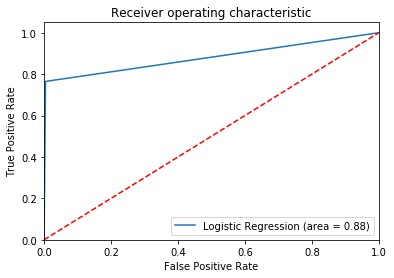

In [207]:
##plotting the roc curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y, y_pred_X)
fpr, tpr, thresholds = roc_curve(y, y_pred_X)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [209]:
##we now perform binary relevance modelling where we have binary classifiers for each label

#In a binary relevance method each label prediction is considered as an independent classification problem
##We build n number of binary classification models based on n labels present in the data
##hence in this case we have six classification models for each label

#Assumption-Each label is independent and there is no co existing relationship among the labels



for label in target_cols:
    print('... Processing {}'.format(label))
    y = train[label]
    model.fit(X_train_dtm, y)
    y_pred_X = model.predict(X_train_dtm)
    print('AUC = ' + str(roc_auc_score(y,y_pred_X)))
    roc_curve(y,y_pred_X)
    print(classification_report(y,y_pred_X))
# Cross Validated Fit and compute accuracies
    k_fold = KFold(n_splits=10, shuffle=True, random_state=None)
    cross_score = cross_val_score(model, X_train_dtm, y, cv=k_fold, n_jobs=1)
    print('Average Accuracy = ' + str(np.mean(cross_score)))
    print('Fold Accuracies = ' + str(cross_score))


... Processing obscene
AUC = 0.8802516136963089
             precision    recall  f1-score   support

          0       0.99      1.00      0.99    151122
          1       0.91      0.76      0.83      8449

avg / total       0.98      0.98      0.98    159571

Average Accuracy = 0.97866154860683
Fold Accuracies = [0.97668881 0.97806605 0.97888074 0.97850473 0.9797581  0.97919408
 0.97925675 0.97881807 0.97769004 0.9797581 ]
... Processing insult
AUC = 0.8193603990048192
             precision    recall  f1-score   support

          0       0.98      0.99      0.99    151694
          1       0.83      0.65      0.73      7877

avg / total       0.97      0.98      0.97    159571

Average Accuracy = 0.9710661602832019
Fold Accuracies = [0.97280361 0.97035784 0.97104719 0.97010716 0.9702325  0.97286457
 0.97129786 0.97029517 0.97092185 0.97073385]
... Processing toxic
AUC = 0.8549657511855497
             precision    recall  f1-score   support

          0       0.97      0.99      0

In [210]:
##testing correlation in the data

train.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Char_length,comment_clean,comment_clean2,tokens,text_lem1
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,explanation why the edits made under my userna...,explanation edits made username hardcore metal...,"[explanation, edits, made, username, hardcore,...",explanation edit make username hardcore metall...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,d'aww ! he matches this background colour i am...,d'aww ! matches background colour seemingly st...,"[d'aww, !, matches, background, colour, seemin...",d'aww ! match background colour seemingly stic...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,hey man i am really not trying to edit war it ...,hey man really trying edit war 's guy constant...,"[hey, man, really, trying, edit, war, 's, guy,...",hey man really try edit war 's guy constantly ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,more i can not make any real suggestions on im...,make real suggestions improvement wondered sec...,"[make, real, suggestions, improvement, wondere...",make real suggestions improvement wonder secti...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,you sir are my hero any chance you remember wh...,sir hero chance remember page 's,"[sir, hero, chance, remember, page, 's]",sir hero chance remember page 's


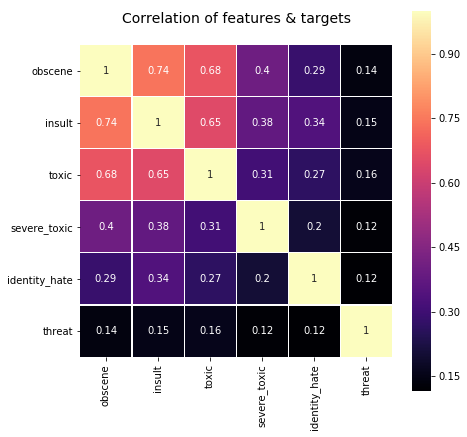

In [212]:
# Correlation Testing for Target Labels
import seaborn as sns

target_data = train[target_cols]

colormap = plt.cm.magma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(target_data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)


In [219]:
##concept of classifier chains

##till now we have seen the data is a set of comments as documents and all the words have been transformed
#as features.These words with their respective idf values are acting the predictors in the model

#From the correlation plots we observe that the labels are related and can be used as predictors for other labels too.
#The assumption that each label is independent may not be suitable here


##Classifier chain

#In this, the first classifier is trained just on the input data and then each next classifier is trained on the input 
#space and all the previous classifiers in the chain.
#Each label is fed as an input and predictor for the next classifier


##checking the data,how it looks now
X_df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
155348,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140838,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53020,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149117,0.134276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.13953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146210,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [243]:
##executing a clasifier chain using logistic reg classification algorithm
from scipy.sparse import csr_matrix, hstack

#hstack is used to add data column wise
hstack([X_train_dtm, csr_matrix(train['toxic']).T])

#alternate code for the same operation

#x=np.asmatrix(train['toxic'])
#hstack([X_train_dtm, x.T])


<159571x5001 sparse matrix of type '<class 'numpy.float64'>'
	with 3711550 stored elements in COOrdinate format>

In [244]:
def add_feature(X, feature_to_add):
    '''
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    '''
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')



In [252]:
for label in target_cols:
    print('... Processing {}'.format(label))
    y = train[label]
    model.fit(X_train_dtm, y)
    y_pred_X = model.predict(X_train_dtm)
    print('AUC = ' + str(roc_auc_score(y,y_pred_X)))
    roc_curve(y,y_pred_X)
    print(classification_report(y,y_pred_X))
# Cross Validated Fit and compute accuracies
    k_fold = KFold(n_splits=10, shuffle=True, random_state=None)
    cross_score = cross_val_score(model, X_train_dtm, y, cv=k_fold, n_jobs=1)
    print('Average Accuracy = ' + str(np.mean(cross_score)))
    print('Fold Accuracies = ' + str(cross_score))
    ##adding feature to the input data
    X_train_dtm = add_feature(X_train_dtm, y)
    print((X_train_dtm).shape)


... Processing obscene
AUC = 0.8802516136963089
             precision    recall  f1-score   support

          0       0.99      1.00      0.99    151122
          1       0.91      0.76      0.83      8449

avg / total       0.98      0.98      0.98    159571

Average Accuracy = 0.9791691514314819
Fold Accuracies = [0.97850608 0.98000877 0.97969543 0.97631134 0.97988344 0.98000877
 0.98132481 0.97806605 0.97931942 0.9785674 ]
(159571, 5001)
... Processing insult
AUC = 0.8816089256807977
             precision    recall  f1-score   support

          0       0.99      0.99      0.99    151694
          1       0.85      0.77      0.81      7877

avg / total       0.98      0.98      0.98    159571

Average Accuracy = 0.9761736044237764
Fold Accuracies = [0.9779421  0.97543398 0.97537131 0.97700069 0.97668735 0.97512064
 0.97662468 0.97612333 0.97593533 0.97549665]
(159571, 5002)
... Processing toxic
AUC = 0.8688217252625722
             precision    recall  f1-score   support

       

In [ ]:
###trying an ensemble model
##in this we are trying to use two modelling techniques as binary classifiers for each label and then
## computing the average of the predicted values to give the final prob value for each label

In [253]:
from sklearn.ensemble import AdaBoostClassifier


model1=LogisticRegression(C=12.0)
model2=AdaBoostClassifier(n_estimators=400,learning_rate=1,algorithm='SAMME')

for label in target_cols:
    print('... Processing {}'.format(label))
    y = train[label]
    model1.fit(X_train_dtm, y)
    model2.fit(X_train_dtm, y)
    y_pred_X = (model1.predict(X_train_dtm)+model2.predict(X_train_dtm))/2
    print('AUC = ' + str(roc_auc_score(y,y_pred_X)))
    roc_curve(y,y_pred_X)
    print(classification_report(y,y_pred_X))

... Processing obscene
AUC = 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    151122
          1       1.00      1.00      1.00      8449

avg / total       1.00      1.00      1.00    159571

... Processing insult
AUC = 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    151694
          1       1.00      1.00      1.00      7877

avg / total       1.00      1.00      1.00    159571

... Processing toxic
AUC = 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    144277
          1       1.00      1.00      1.00     15294

avg / total       1.00      1.00      1.00    159571

... Processing severe_toxic
AUC = 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    157976
          1       1.00      1.00      1.00      1595

avg / total       1.00      1.00      1.00    159571

... Pr

In [254]:
##operation

hi